### Divya Gupta

## Task 3 - Car Price Prediction

The price of a car depends on a lot of factors like the good will of the brand of the car, features of the car, horoscope and the milage it gives and many more. Car price prediction is one of the major research areas in machine learning. 

##### 1. Importing necessary libraries

In [2]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression, LogisticRegression

##### 2. Loading the dataset into the dataframe

In [3]:
df = pd.read_csv('car data.csv')

##### 3.1 Understanding the dataset

In [4]:
print('The top 5 rows of the dataset are')
print(df.head(5))
print()
print('The bottom 5 rows of the data set are')
print(df.tail(5))

The top 5 rows of the dataset are
  Car_Name  Year  Selling_Price  Present_Price  Driven_kms Fuel_Type  \
0     ritz  2014           3.35           5.59       27000    Petrol   
1      sx4  2013           4.75           9.54       43000    Diesel   
2     ciaz  2017           7.25           9.85        6900    Petrol   
3  wagon r  2011           2.85           4.15        5200    Petrol   
4    swift  2014           4.60           6.87       42450    Diesel   

  Selling_type Transmission  Owner  
0       Dealer       Manual      0  
1       Dealer       Manual      0  
2       Dealer       Manual      0  
3       Dealer       Manual      0  
4       Dealer       Manual      0  

The bottom 5 rows of the data set are
    Car_Name  Year  Selling_Price  Present_Price  Driven_kms Fuel_Type  \
296     city  2016           9.50           11.6       33988    Diesel   
297     brio  2015           4.00            5.9       60000    Petrol   
298     city  2009           3.35           11.0  

##### 3.2 Understanding the Statistics of the dataset

In [5]:
print('The shape (rows, columns) of the dataset is as follows: ')
print(df.shape)
print()
print('The size if the dataset is:' ,df.size)
print()
print('The descriptive statistics of dataset is as follows')
print(df.describe())

The shape (rows, columns) of the dataset is as follows: 
(301, 9)

The size if the dataset is: 2709

The descriptive statistics of dataset is as follows
              Year  Selling_Price  Present_Price     Driven_kms       Owner
count   301.000000     301.000000     301.000000     301.000000  301.000000
mean   2013.627907       4.661296       7.628472   36947.205980    0.043189
std       2.891554       5.082812       8.642584   38886.883882    0.247915
min    2003.000000       0.100000       0.320000     500.000000    0.000000
25%    2012.000000       0.900000       1.200000   15000.000000    0.000000
50%    2014.000000       3.600000       6.400000   32000.000000    0.000000
75%    2016.000000       6.000000       9.900000   48767.000000    0.000000
max    2018.000000      35.000000      92.600000  500000.000000    3.000000


##### 3.3 Understanding the features of the dataset

In [6]:
print("Features in the dataset : \n",df.columns)

Features in the dataset : 
 Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Driven_kms',
       'Fuel_Type', 'Selling_type', 'Transmission', 'Owner'],
      dtype='object')


##### 3.4 Summarised Information of the dataset

In [7]:
print("Summarized information of the dataset: \n")
df.info()

Summarized information of the dataset: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


##### 4 Cleaning the Dataset

In [8]:
print("Values in the column of type of fuel \n",df.Fuel_Type.value_counts(),"\n")
print("Values in the column of type of sellers \n",df.Selling_type.value_counts(),"\n")
print("Values in the column of Transmission values \n",df.Transmission.value_counts())

Values in the column of type of fuel 
 Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64 

Values in the column of type of sellers 
 Dealer        195
Individual    106
Name: Selling_type, dtype: int64 

Values in the column of Transmission values 
 Manual       261
Automatic     40
Name: Transmission, dtype: int64


In [9]:
df.Fuel_Type.replace(regex={"Petrol":"0","Diesel":"1","CNG":"2"},inplace=True)
df.Selling_type.replace(regex={"Dealer":"0","Individual":"1"},inplace=True)
df.Transmission.replace(regex={"Manual":"0","Automatic":"1"},inplace=True)

##### 5.1 Visualizing Entire Dataset

<Figure size 900x900 with 0 Axes>

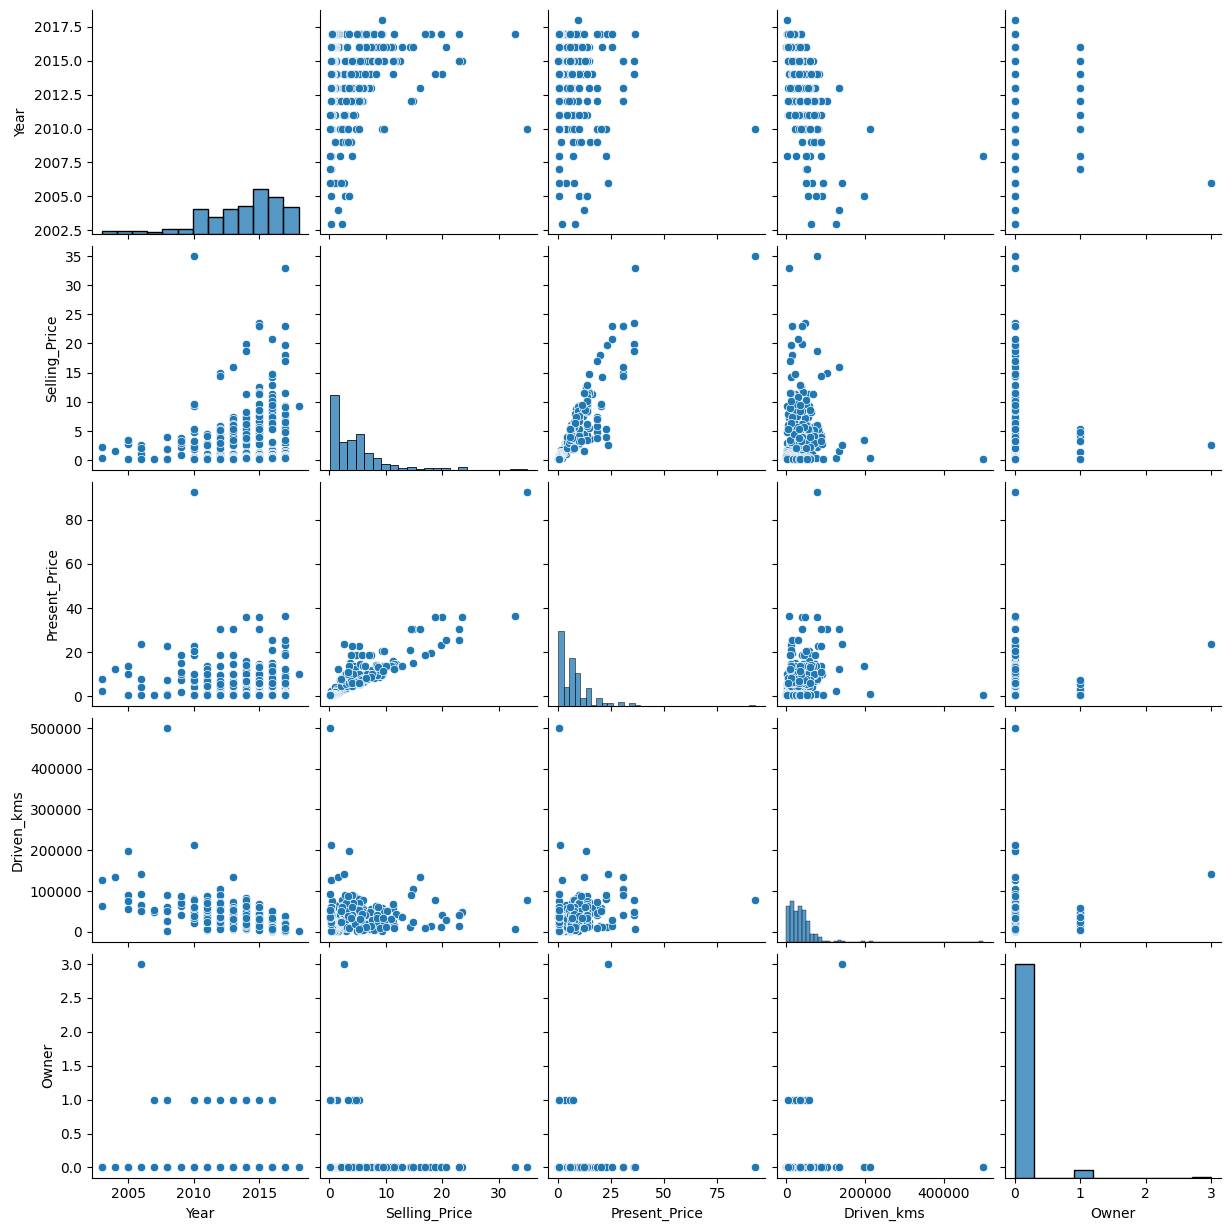

In [10]:
plt.figure(figsize=(9,9))
sns.pairplot(df)
plt.show()

##### 5.2 Visualizing Selling Price and Kms Driven over the year

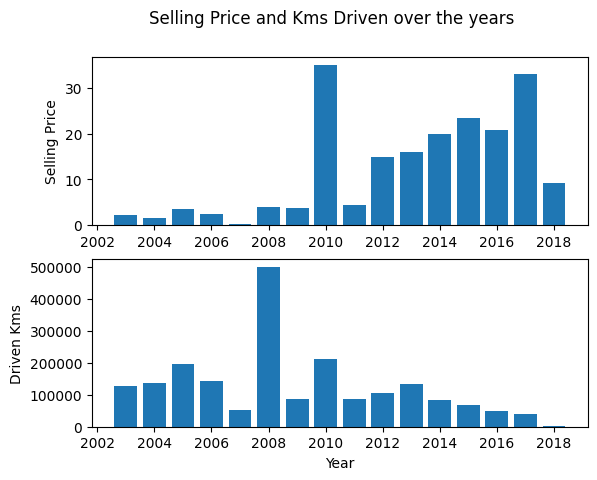

In [11]:
fig,axs = plt.subplots(2)
axs[0].bar(df['Year'],df['Selling_Price'])
axs[1].bar(df['Year'],df['Driven_kms'])
axs[0].set_ylabel('Selling Price')
axs[1].set_xlabel('Year')
axs[1].set_ylabel('Driven Kms')
fig.suptitle('Selling Price and Kms Driven over the years')
plt.show()

##### 5.1 Regression analysis

In [12]:
y=df.Selling_Price
X=df.drop(["Selling_Price","Car_Name"],axis=1)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

In [13]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [14]:
y_pred = regressor.predict(X_test)
print('R2 Score: %.2f'%r2_score(y_test,y_pred))
print('Mean Error: ',mean_squared_error(y_test,y_pred))

R2 Score: 0.85
Mean Error:  3.305691679496193


##### Visualizing Original Vs Predictions

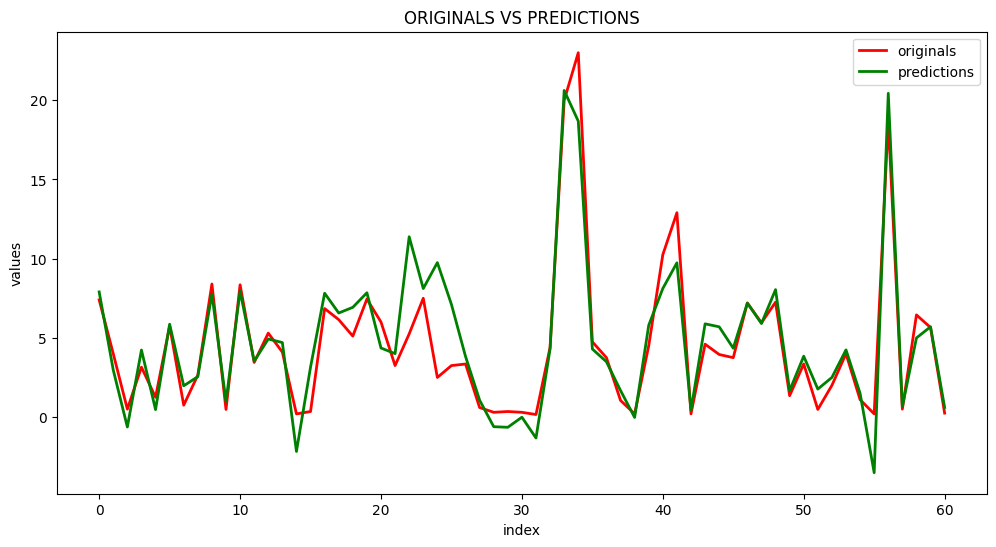

In [15]:
predicts=regressor.predict(X_test)
prediction=pd.DataFrame(predicts)
test_index=y_test.reset_index()["Selling_Price"]
ax=test_index.plot(label="originals",figsize=(12,6),linewidth=2,color="r")
ax=prediction[0].plot(label = "predictions",figsize=(12,6),linewidth=2,color="g")
plt.legend(loc='upper right')
plt.title("ORIGINALS VS PREDICTIONS")
plt.xlabel("index")
plt.ylabel("values")
plt.show()